In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2002 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_02(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_s.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m02=Minuit(twi_minus_loglikelihood_02,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m02.migrad()

pprint(m02.fval)

FCN = 1910.216044874384 
 TOTAL NCALL = 334 
 NCALLS = 334 
 
 
 EDM = 2.8822428260034824e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.876855,0.856182,,,-3,1,No
1,log_f_b,-4.37345,1.20473,,,-7,-2,No
2,alpha_H,2.06945,0.397197,,,1,5,No
3,log_poisson,0.629663,0.0319583,,,-1,3,No


1910.216044874384


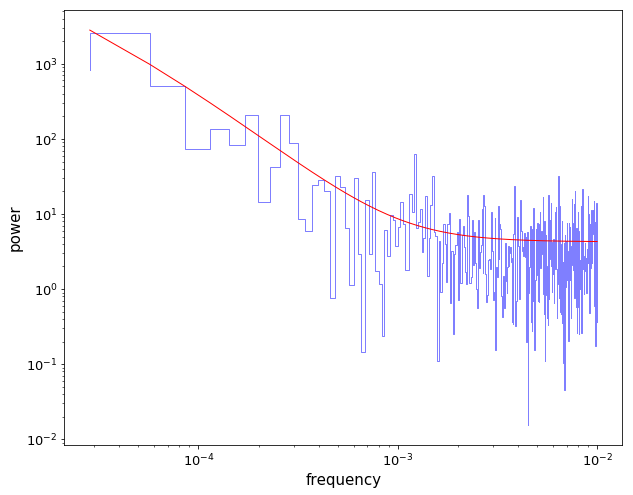

In [4]:
perdata02 = pd.read_csv("perlist02_s.csv")
f_02 = perdata02['f']
per_02 = perdata02['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m02.values[0],m02.values[1],m02.values[2],m02.values[3]

model_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_02.append(((f_02[i]**(-alpha_L))/(1+(f_02[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2002 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_02(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_s.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n02=Minuit(twi_minus_loglikelihood_nobreak_02,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,1),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n02.migrad()

print(n02.fval)

FCN = 1910.473555631998 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 1.6245755531488647e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.09192,0.658505,,,-8,1,No
1,alpha,1.91585,0.19086,,,1,5,No
2,log_poisson,0.624469,0.0309715,,,-1,3,No


1910.473555631998


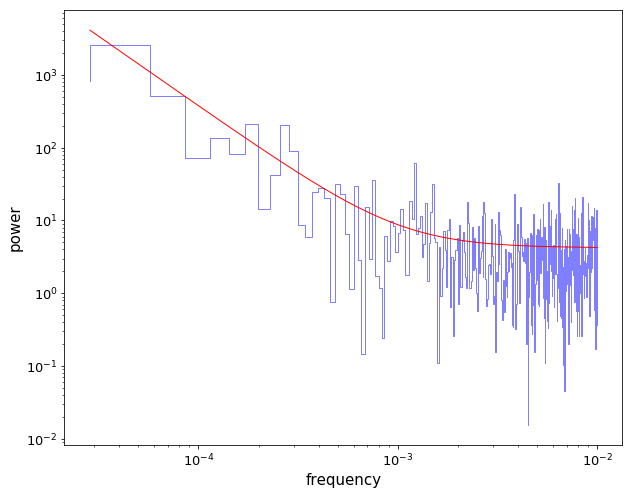

In [7]:
log_A,alpha,log_poisson = n02.values[0],n02.values[1],n02.values[2]

model_nob_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_nob_02.append((f_02[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_nob_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.2575107576139999


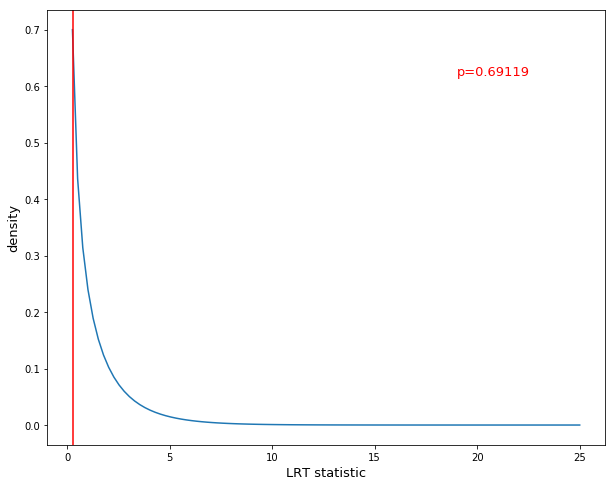

In [8]:
import scipy.stats as stats

# LRT statistic
T = n02.fval-m02.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2011(4) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_114(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata114 = pd.read_csv("perlist114_s.csv")
    f = perdata114['f']
    per = perdata114['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata114)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m114=Minuit(twi_minus_loglikelihood_114,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m114.migrad()

pprint(m114.fval)

FCN = 5750.50764683227 
 TOTAL NCALL = 350 
 NCALLS = 350 
 
 
 EDM = 0.00022426148154745093 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.015335,1.45273,,,-3,1,No
1,log_f_b,-5.45812,1.82074,,,-7,-2,No
2,alpha_H,1.93953,0.14271,,,1,5,No
3,log_poisson,0.554624,0.0182236,,,-1,3,No


5750.50764683227


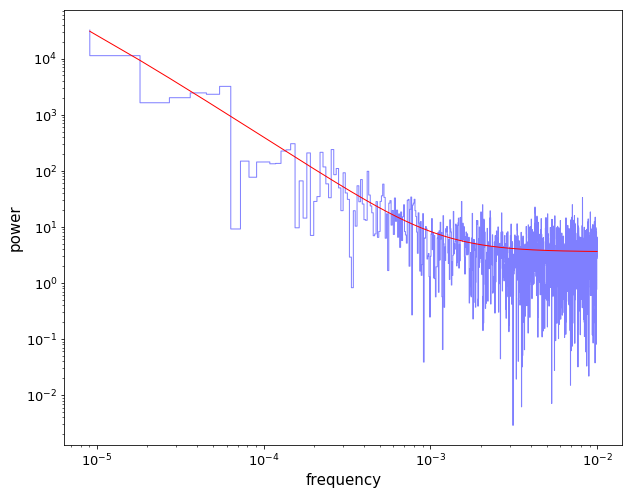

In [11]:
perdata114 = pd.read_csv("perlist114_s.csv")
f_114 = perdata114['f']
per_114 = perdata114['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m114.values[0],m114.values[1],m114.values[2],m114.values[3]

model_114 = []
f_length_114 = len(f_114)
for i in range(f_length_114):
    model_114.append(((f_114[i]**(-alpha_L))/(1+(f_114[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_114, per_114, color="b", alpha=0.5, linewidth=1)
plt.plot(f_114, model_114, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2011(4) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_114(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata114 = pd.read_csv("perlist114_s.csv")
    f = perdata114['f']
    per = perdata114['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata114)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n114=Minuit(twi_minus_loglikelihood_nobreak_114,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n114.migrad()

pprint(n114.fval)

FCN = 5750.57867064409 
 TOTAL NCALL = 105 
 NCALLS = 105 
 
 
 EDM = 1.1504499009707308e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.04974,0.325616,,,-8,-1,No
1,alpha,1.90925,0.0949227,,,1,5,No
2,log_poisson,0.553089,0.0177203,,,-1,3,No


5750.57867064409


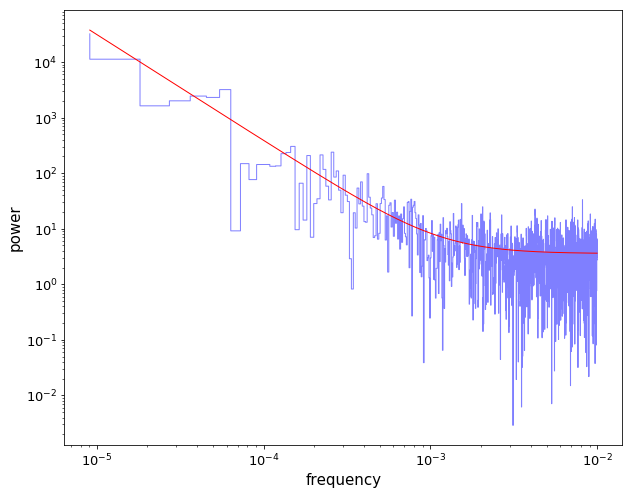

In [14]:
log_A,alpha,log_poisson = n114.values[0],n114.values[1],n114.values[2]

model_nob_114 = []
f_length_114 = len(f_114)
for i in range(f_length_114):
    model_nob_114.append((f_114[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_114, per_114, color="b", alpha=0.5, linewidth=1)
plt.plot(f_114, model_nob_114, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.07102381181994133


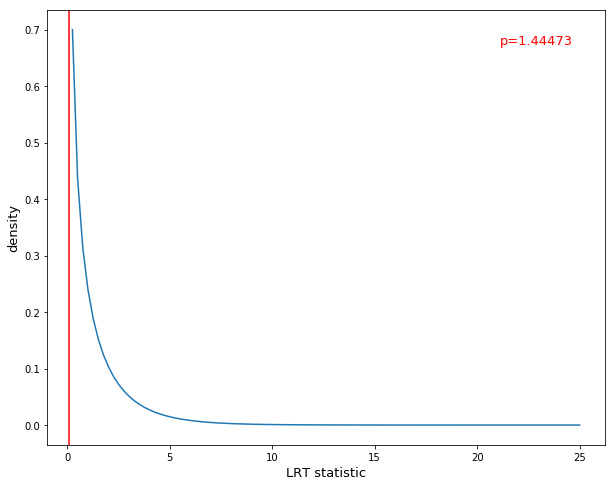

In [15]:
import scipy.stats as stats

# LRT statistic
T = n114.fval-m114.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2016(2) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_162(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata162 = pd.read_csv("perlist162_s.csv")
    f = perdata162['f']
    per = perdata162['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata162)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m162=Minuit(twi_minus_loglikelihood_162,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m162.migrad()

pprint(m162.fval)

FCN = 5601.656515710744 
 TOTAL NCALL = 340 
 NCALLS = 340 
 
 
 EDM = 3.0781518380377376e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.589692,0.967774,,,-3,1,No
1,log_f_b,-5.10689,1.39105,,,-7,-2,No
2,alpha_H,1.87307,0.162365,,,1,5,No
3,log_poisson,0.430932,0.0183459,,,-1,3,No


5601.656515710744


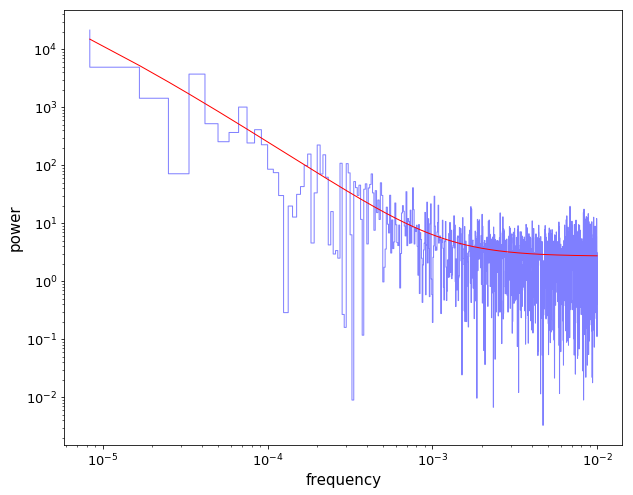

In [18]:
perdata162 = pd.read_csv("perlist162_s.csv")
f_162 = perdata162['f']
per_162 = perdata162['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m162.values[0],m162.values[1],m162.values[2],m162.values[3]

model_162 = []
f_length_162 = len(f_162)
for i in range(f_length_162):
    model_162.append(((f_162[i]**(-alpha_L))/(1+(f_162[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_162, per_162, color="b", alpha=0.5, linewidth=1)
plt.plot(f_162, model_162, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2016(2) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_162(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata162 = pd.read_csv("perlist162_s.csv")
    f = perdata162['f']
    per = perdata162['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata162)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n162=Minuit(twi_minus_loglikelihood_nobreak_162,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n162.migrad()

pprint(n162.fval)

FCN = 5601.87840708109 
 TOTAL NCALL = 105 
 NCALLS = 105 
 
 
 EDM = 8.317825729684978e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-4.85738,0.307722,,,-8,-2,No
1,alpha,1.80996,0.0903616,,,1,5,No
2,log_poisson,0.427503,0.0176019,,,-1,3,No


5601.87840708109


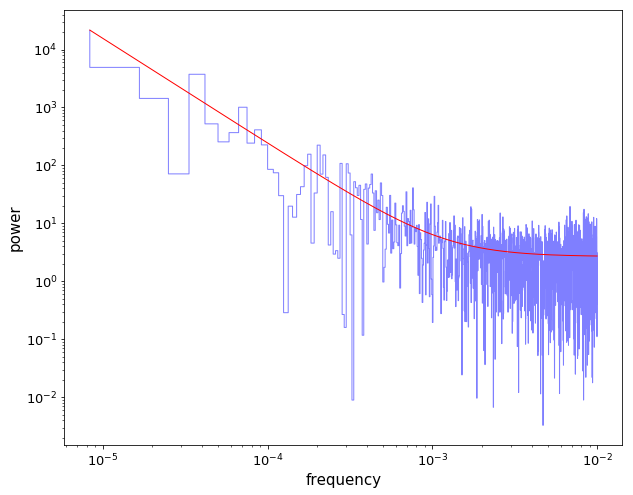

In [21]:
log_A,alpha,log_poisson = n162.values[0],n162.values[1],n162.values[2]

model_nob_162 = []
f_length_162 = len(f_162)
for i in range(f_length_162):
    model_nob_162.append((f_162[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_162, per_162, color="b", alpha=0.5, linewidth=1)
plt.plot(f_162, model_nob_162, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.22189137034547457


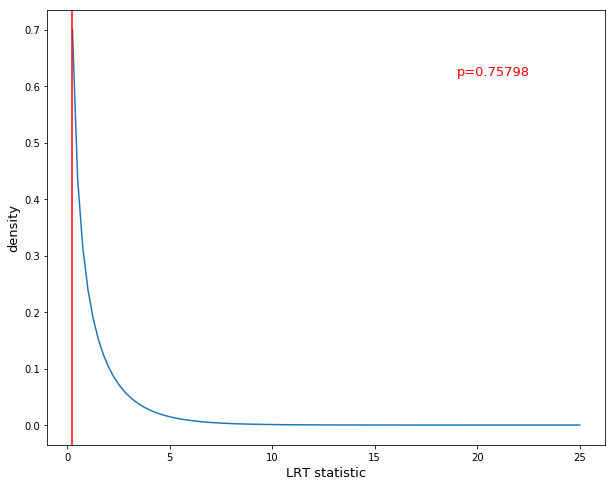

In [22]:
import scipy.stats as stats

# LRT statistic
T = n162.fval-m162.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data02 = pd.read_csv("energy_iras13224_02.csv")  
x02 = data02['x']
y02 = data02['y']
xerr02 = data02['xerr']
yerr02 = data02['yerr']

data114 = pd.read_csv("energy_iras13224_114.csv")  
x114 = data114['x']
y114 = data114['y']
xerr114 = data114['xerr']
yerr114 = data114['yerr']

data162 = pd.read_csv("energy_iras13224_162.csv")  
x162 = data162['x']
y162 = data162['y']
xerr162 = data162['xerr']
yerr162 = data162['yerr']

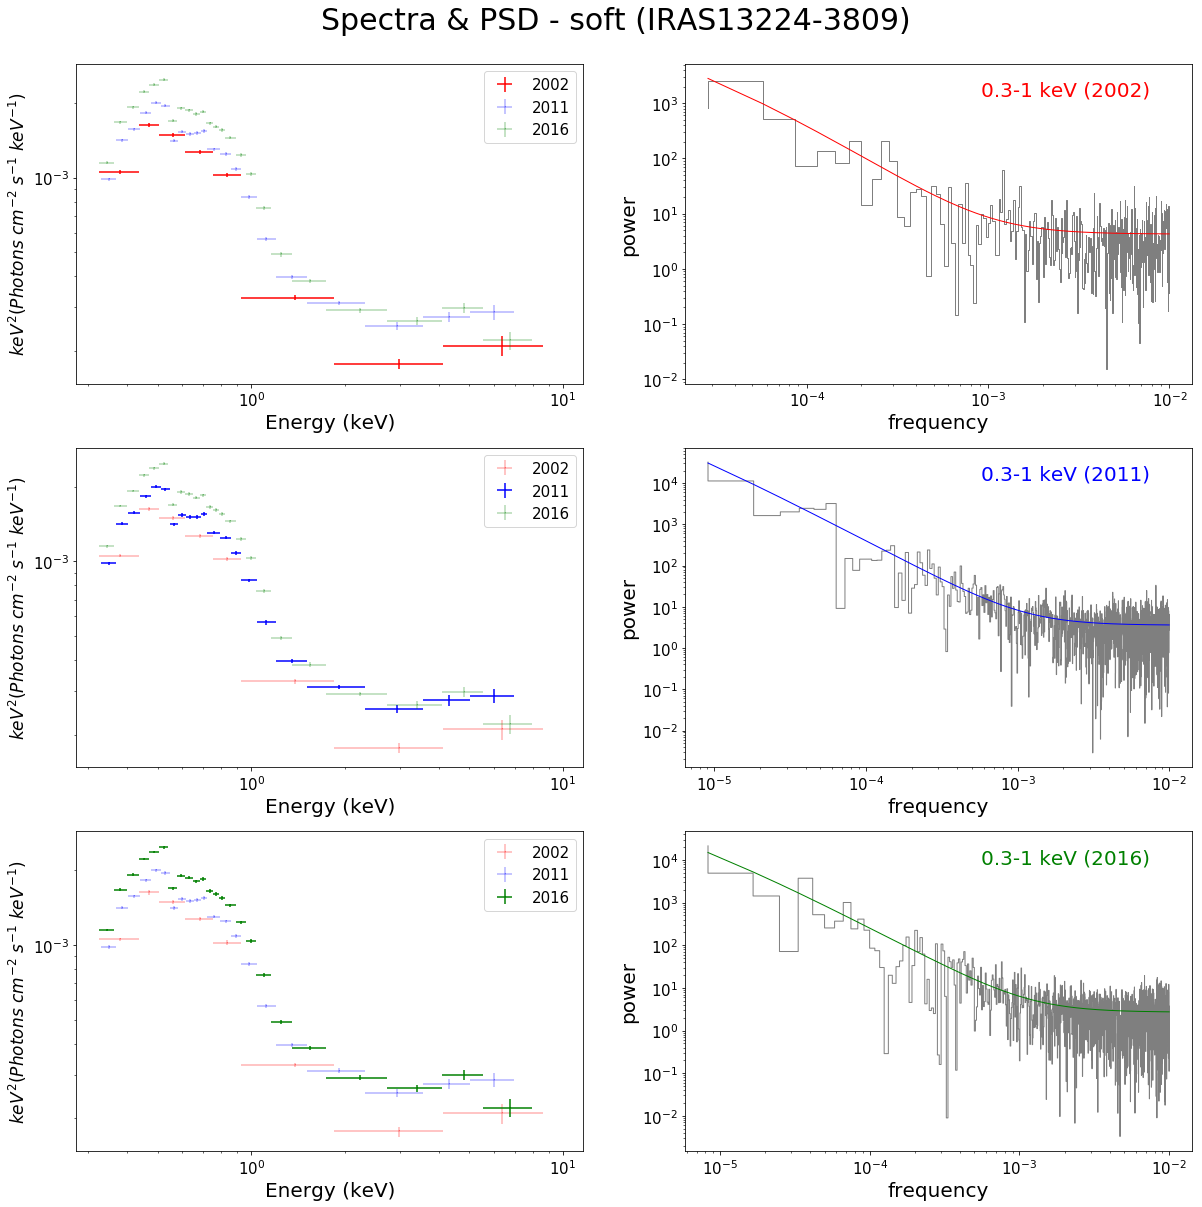

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)



ax1.loglog()
ax1.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', label='2002')
ax1.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', alpha=0.3, label='2011')
ax1.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', alpha=0.3, label='2016')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
ax3.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', label='2011')
ax3.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', alpha=0.3, label='2016')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
ax5.errorbar(x114, y114, yerr=yerr114, xerr=xerr114, fmt=',b', alpha=0.3, label='2011')
ax5.errorbar(x162, y162, yerr=yerr162, xerr=xerr162, fmt=',g', label='2016')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_02, per_02, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_02, model_02, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2002)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_114, per_114, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_114, model_114, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2011)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_162, per_162, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_162, model_162, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2016)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)

plt.suptitle("Spectra & PSD - soft (IRAS13224-3809)", x=0.5, y=0.92, fontsize=30)
plt.show()